# Explore Zillow

In [1]:
import numpy as np
import pandas as pd

import acquire
import wrangle_zillow
from env import host, user, password

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

**Goals of exploration**
- Can we see patterns, find signals in the data? 
- What features are driving the outcome?
- Are there other features we can construct that have stronger relationships? 
- Use Visualization and statistical testing to help answer these questions. 
- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).  

**Agenda**
- Wrangle data (acquire, prep, summarize, split)
- Identify questions to answer, hypotheses to test.

In [2]:
# bring the dataframe in 
df = wrangle_zillow.get_zillow_cluster()

In [3]:
# clean, split, impute
train, \
validate, \
test, \
X_train, \
y_train, \
X_validate, \
y_validate, \
X_test, \
y_test = wrangle_zillow.prep_zillow_cluster(df)

In [4]:
print(train.shape)
print(validate.shape)
print(test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(27064, 29)
(11600, 29)
(9666, 29)
(27064, 28)
(27064,)
(11600, 28)
(11600,)
(9666, 28)
(9666,)


1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [5]:
# in the scope of exploration:
# frame questions with our tools:
# univariate exploration
# bivariate exploration
# multivariate exploration

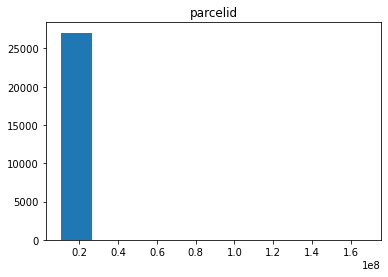

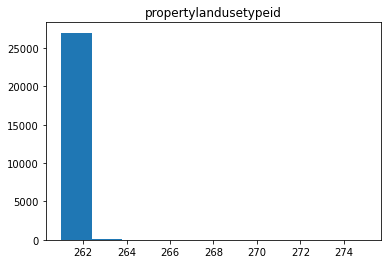

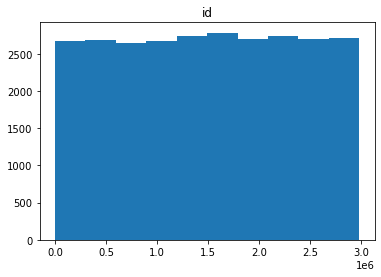

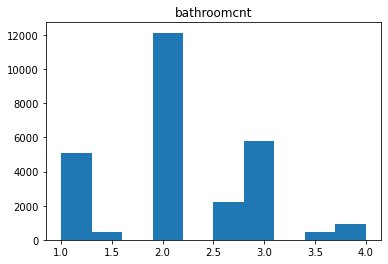

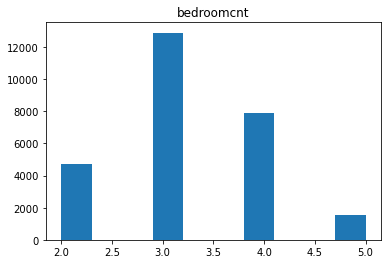

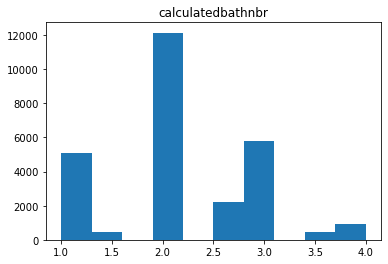

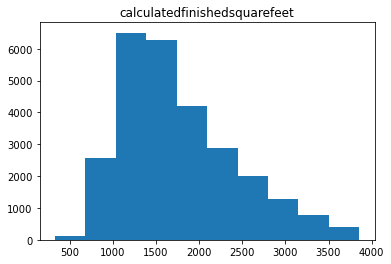

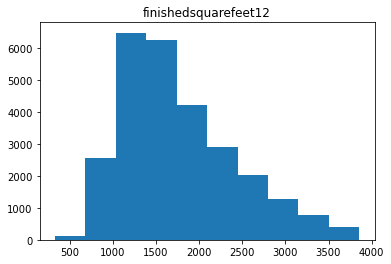

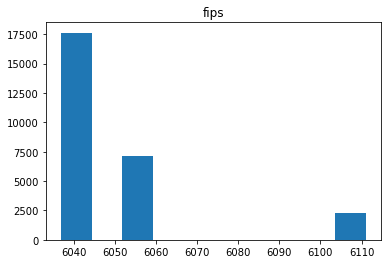

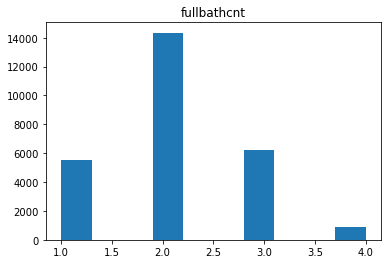

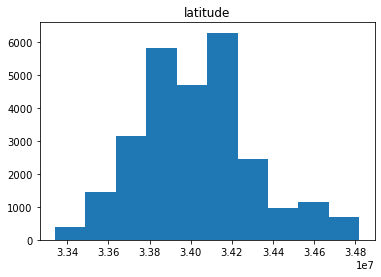

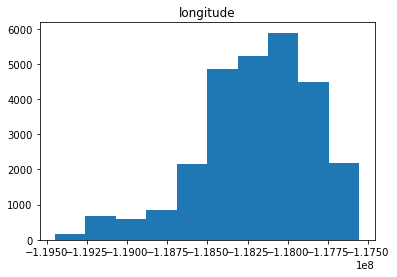

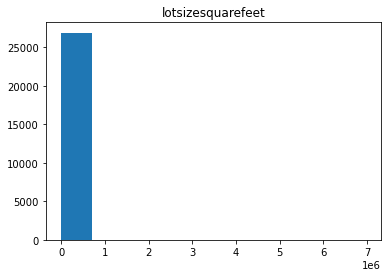

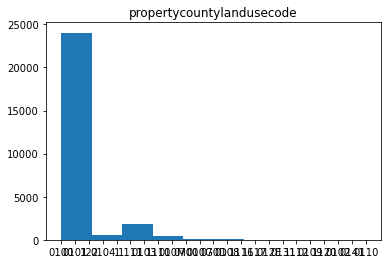

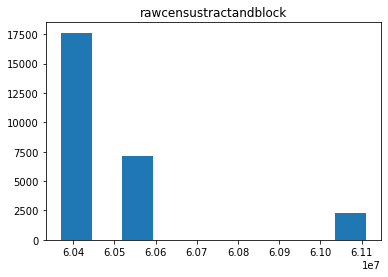

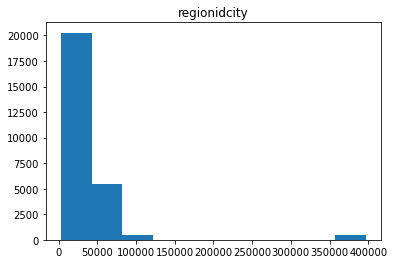

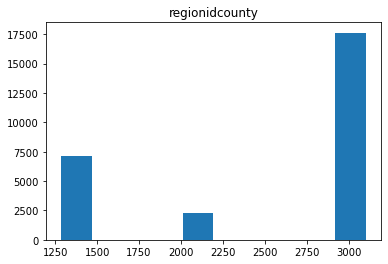

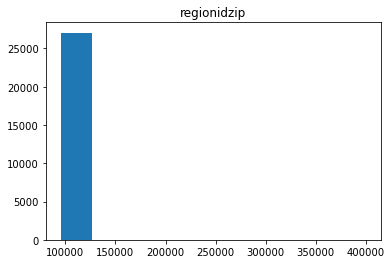

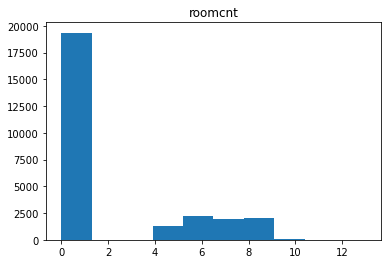

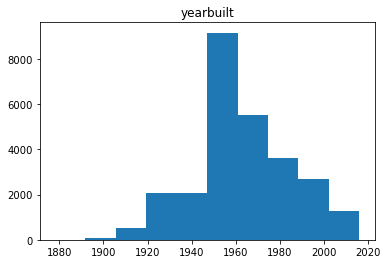

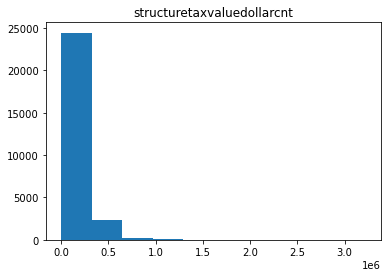

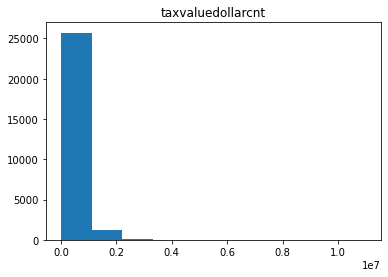

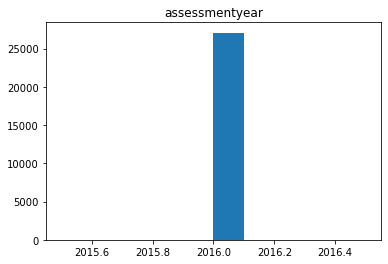

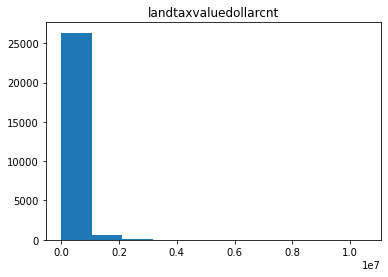

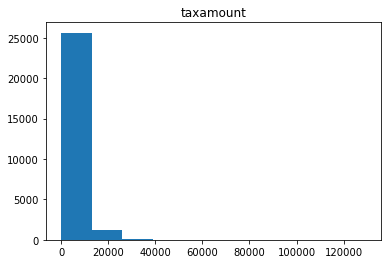

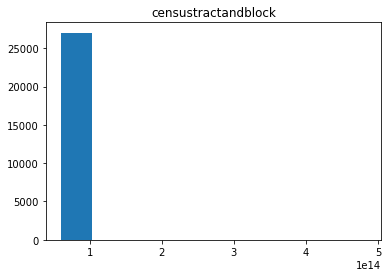

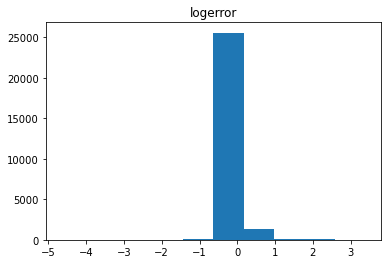

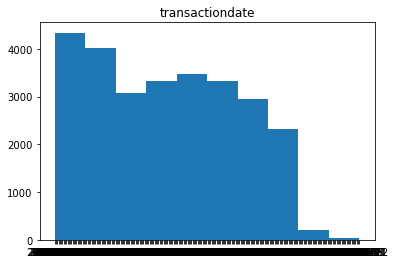

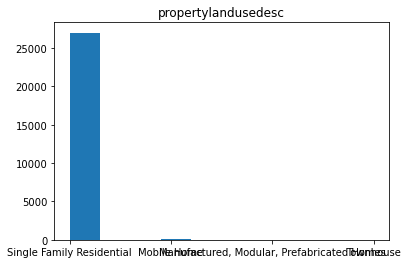

In [6]:
# 1. univariate exploration
# what are the distributions of each variable?
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Univariate Takewaways
- Roughly Normal Distributions:
    - bathroomcnt, bedroomcnt, calculatedbathnbr, 'fullbathcnt', 'latitude',
- Left Skewed Distributions:
    - 'longitude',
- Right Skewed Distributions:
    - calculatedfinishedsquarefeet, finishedsquarefeet12, 'transactiondate'
- Not Useful:
    - parcelid, propertylandusetypeid, id
- Still need to clasify:   
  'fips',  
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', ,
       'propertylandusedesc'

2. Answer those questions through a mix of statistical tests and visualizations.

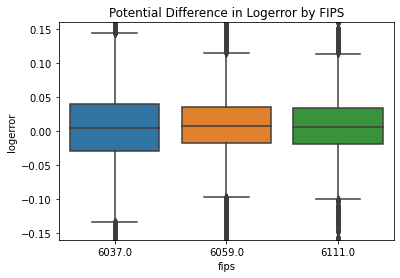

In [8]:
# 1. Bivariate:
# Does logerror vary across fips?

sns.boxplot(train['fips'], train['logerror'])
plt.title('Potential Difference in Logerror by FIPS')
plt.ylim(-.16, .16)
plt.show()

In [25]:
# null hyothesis: mean_6037 == mean_6111
# alt hypothesis: mean_is_6037 != mean_6111

# Using levene to test variance
print(stats.levene(train[train.fips==6037].logerror, train[train.fips==6111].logerror))

# using two sample, two tailed ttest
print(stats.ttest_ind(train[train.fips==6037].logerror, train[train.fips==6111].logerror, equal_var=False))

LeveneResult(statistic=19.041305912487942, pvalue=1.2856280567074697e-05)
Ttest_indResult(statistic=0.16706585394846327, pvalue=0.8673298498128853)


#### Takeaways:
- due to the high p value, we fail to reject the null hypothesis.

In [ ]:
# 2. Bivariate:
# Is there a relationship between logerror and calculatedbathnbr?

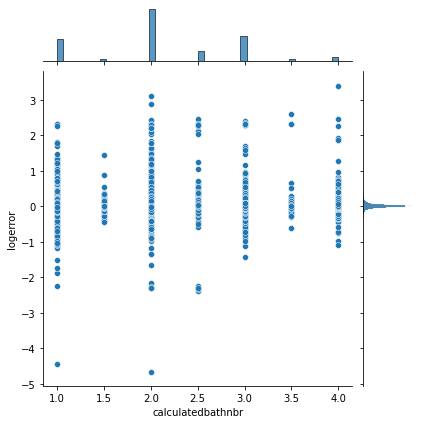

In [26]:
sns.jointplot(x='calculatedbathnbr', y='logerror', data=train)
plt.xlabel('calculatedbathnbr')
plt.ylabel('logerror')
plt.show()

In [11]:
# H0: Variance in logerror for homes with 3 or more calculatedbathnbr = those with fewer than 3.
stats.levene(train[train['calculatedbathnbr'] >= 3].logerror, train[train['calculatedbathnbr'] < 3].logerror)

LeveneResult(statistic=13.212661769774137, pvalue=0.0002785794408983627)

In [12]:
# H0: Mean logerror for homes with 3 or more calculatedbathnbr = those with fewer than 3.
stats.ttest_ind(train[train['calculatedbathnbr'] >= 3].logerror, train[train['calculatedbathnbr'] < 3].logerror)

Ttest_indResult(statistic=2.6149412450697307, pvalue=0.00892923005035405)

In [ ]:
# 3. Bivariate:
# Is there a relationship between logerror and transactiondate?

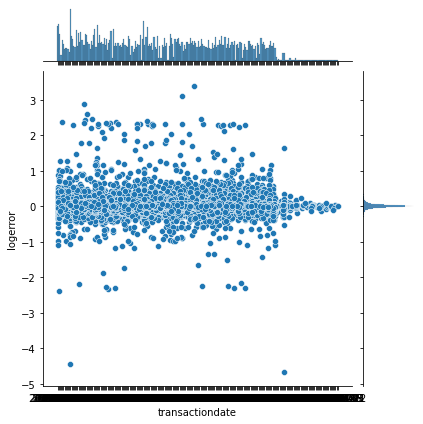

In [10]:
sns.jointplot(x='transactiondate', y='logerror', data=train)
plt.xlabel('transactiondate')
plt.ylabel('logerror')
plt.show()

In [ ]:
# 4. Multivariate:
# If we control for fips, does logerror differ across tax_amount?

In [ ]:
# 5. Multivariate:
# 5. If we control for year built, does logerror differ across roomcnt?

BONUS: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.